In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from numba import cuda


tf.keras.backend.clear_session()


In [2]:
train_dir = '../data/dogs-vs-cats/training/'
valid_dir = '../data/dogs-vs-cats/validation/'

dogs_train_dir = '../data/dogs-vs-cats/training/dogs/'
cats_train_dir = '../data/dogs-vs-cats/training/cats/'

dogs_valid_dir = '../data/dogs-vs-cats/validation/dogs/'
cats_valid_dir = '../data/dogs-vs-cats/validation/cats/'

In [3]:
model = tf.keras.models.load_model('../Course-1/dogs-vs-cats.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

## Visualizing effect of convolutions

In [4]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

#### Getting Inputs of the model

In [6]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [7]:
successive_outputs

[<tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 74, 74, 16) dtype=float32>,
 <tf.Tensor 'conv2d_1/Identity:0' shape=(None, 72, 72, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/Identity:0' shape=(None, 36, 36, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Identity:0' shape=(None, 34, 34, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/Identity:0' shape=(None, 17, 17, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3/Identity:0' shape=(None, 15, 15, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/Identity:0' shape=(None, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'flatten/Identity:0' shape=(None, 3136) dtype=float32>,
 <tf.Tensor 'dense/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dropout/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_1/Identity:0' shape=(None, 1) dtype=float32>]

#### Defining a Visualizing Model

In [8]:
visualization_model = tf.keras.models.Model(inputs = model.inputs,outputs = successive_outputs)

In [9]:
visualization_model

#### Getting a Random Image to visualize

In [11]:
import os
cats_train_fnames = os.listdir( cats_train_dir )
dogs_train_fnames = os.listdir( dogs_train_dir )

dogs_img_files = [os.path.join(dogs_train_dir,f) for f in dogs_train_fnames]
cats_img_files = [os.path.join(cats_train_dir,f) for f in cats_train_fnames]

In [32]:
img_path = random.choice(cats_img_files + dogs_img_files)

In [33]:
img = load_img(img_path,target_size=(150,150))

In [34]:
x = img_to_array(img)        #(150,150,3)
x = x.reshape((1,) + x.shape)#(1,150,150,3)

In [35]:
x /= 255.0

#### Predicting output to visualize its layer by layer output. 

In [36]:
successive_feature_maps = visualization_model.predict(x)

In [37]:
layer_names = [layer.name for layer in model.layers]

#### Defining a Display grid and adding (size,size*n_features) images next to each other within a layer.

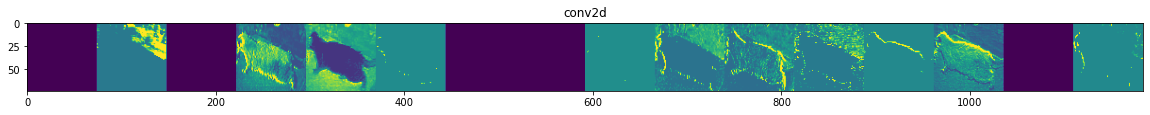

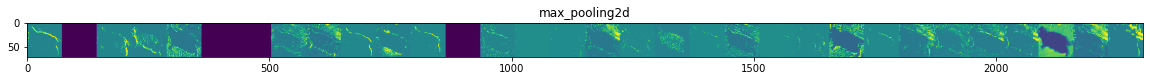

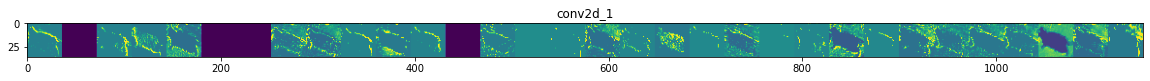

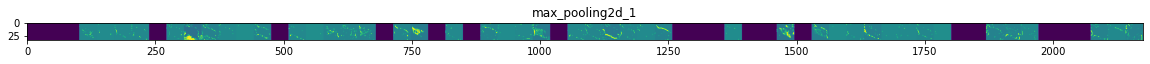

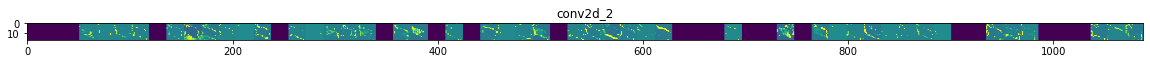

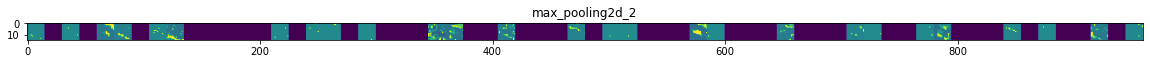

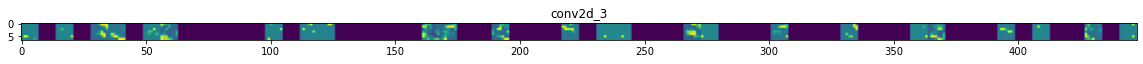

In [39]:
for layer_name,feature_map in zip(layer_names,successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features= feature_map.shape[-1]   # (1,size,size,n_features)
        size = feature_map.shape[1] 
        
        display_grid = np.zeros((size,size*n_features))
        
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size : (i + 1) * size] = x
            
        scale = 20 / n_features
        plt.figure(figsize=(scale*n_features,scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap = 'viridis')
        
        
        